In [1]:
using LCIO
using GRUtils

# Simple Z reconstruction
The dominant Higgs production channel at a 250 GeV ILC is the associated production with Z bosons.
We demonstrate a couple of simple concepts of the physics analysis and plot the invariant mass of the Z boson in events with Z decays to muons.

In [2]:
const FILENAME="/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.slcio"

"/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.slcio"

In [17]:
# This function prints a couple of simple properties of the LCIO particle
function printParticle(particle)
    parents = getParents(particle)
    parentPDG = 0
    if length(parents) > 0
        parentPDG = getPDG(parents[1])
    end
    println("\t", getPDG(particle), "\t", parentPDG)
end

printParticle (generic function with 1 method)

In [4]:
# This function prints the name and the LCIO type for all collections in the event
function printCollections(event)
    println("name \t type")
    for name in getCollectionNames(event)
        coll = getCollection(event, name)
        println(name, "\t", getTypeName(coll))
    end
    println()
end

printCollections (generic function with 1 method)

In [16]:
# simple histograms
nParticleList = Int[]
nMuonList = Int[]
muonEnergyList = Float64[]
zMassList = Float64[]
LCIO.open(FILENAME) do reader
    iEvent = 0
    for event in reader
        iEvent += 1
        if iEvent == 1
            printCollections(event)
        end
        iParticle = 0
        iMuon = 0
        zMomentum = Float64[0, 0, 0, 0]
        for particle in getCollection(event, "MCParticle")
            iParticle += 1
            # we're printing out only event number 1
            if iEvent == 1
                print(iParticle)
                printParticle(particle)
            end
            if abs(getPDG(particle)) == 13 && length(getParents(particle)) == 0
                # Cheating! In this simulation the Z decay products don't have a parent
                if length(getParents(particle)) == 0
                    e = getEnergy(particle)
                    p = getMomentum(particle)
                    zMomentum[1] += e
                    zMomentum[2:4] .+= p
                end 
            end
            if getGeneratorStatus(particle) != 1
                continue
            end
            # we count the number of muons
            if abs(getPDG(particle)) == 13
                iMuon += 1
                push!(muonEnergyList, getEnergy(particle))
            end
        end
        push!(nParticleList, iParticle)
        push!(nMuonList, iMuon)
        push!(zMassList, √(zMomentum[1]^2 + sum(zMomentum[2:4].^2)))
    end
    println("read ", iEvent, " events")
end

name 	 type
MCParticle	LCIO.MCParticle

1	22	0
2	22	0
3	13	0
4	-13	0
5	25	0
6	22	22
7	22	22
8	13	13
9	-13	-13
10	25	25
11	94	-13
12	13	94
13	-13	94
14	-13	-13
15	22	-13
16	5	25
17	-5	25
18	94	5
19	5	94
20	-5	94
21	5	5
22	21	5
23	-5	-5
24	21	-5
25	21	21
26	21	21
27	5	5
28	21	21
29	21	21
30	21	21
31	-5	-5
32	92	5
33	-523	92
34	10213	92
35	-213	92
36	213	92
37	311	92
38	-10313	92
39	-215	92
40	20523	92
41	-521	-523
42	22	-523
43	223	10213
44	211	10213
45	-211	-213
46	111	-213
47	211	213
48	111	213
49	130	311
50	-323	-10313
51	211	-10313
52	-321	-215
53	311	-215
54	523	20523
55	111	20523
56	20423	-521
57	-20423	-521
58	-321	-521
59	-211	223
60	211	223
61	111	223
62	22	111
63	22	111
64	22	111
65	22	111
66	-321	-323
67	111	-323
68	130	311
69	521	523
70	22	523
71	22	111
72	22	111
73	413	20423
74	-211	20423
75	-413	-20423
76	211	-20423
77	22	111
78	22	111
79	22	111
80	22	111
81	14	521
82	-13	521
83	-423	521
84	421	413
85	211	413
86	-421	-413
87	-211	-413
88	-421	-423
89	111	-423
90	-323	421
91

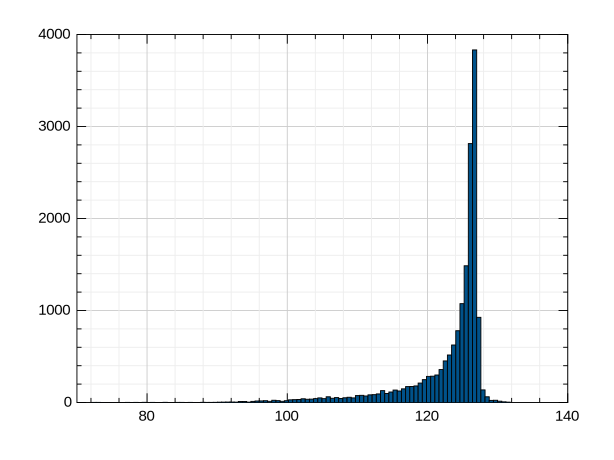

In [14]:
histogram(zMassList, nbins=100)

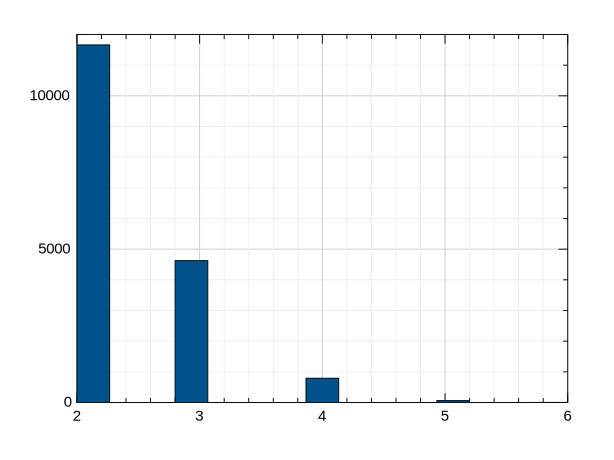

In [9]:
histogram(nMuonList)

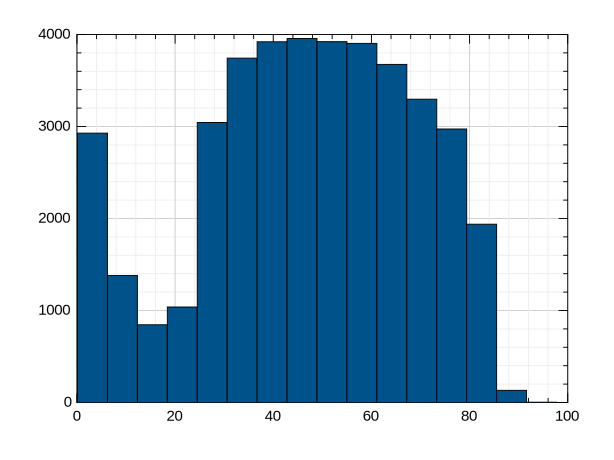

In [11]:
histogram(muonEnergyList)

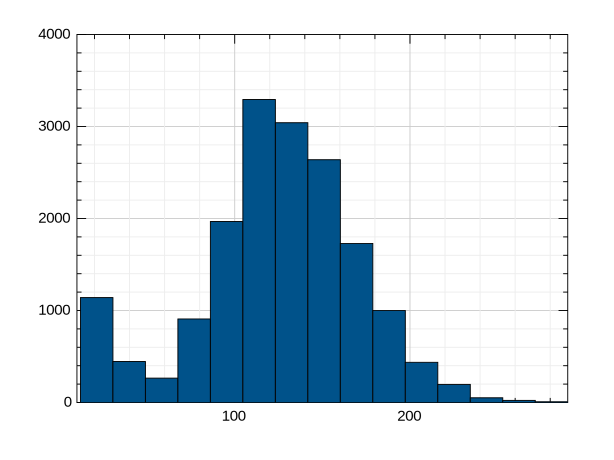

In [10]:
histogram(nParticleList)